<a href="https://colab.research.google.com/github/ElavarasanAJ/Spark/blob/main/Prisoners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.4.2/spark-3.4.2-bin-hadoop3.tgz
!tar xf spark-3.4.2-bin-hadoop3.tgz
!pip install -q findspark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.2-bin-hadoop3"

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types  import DoubleType
import matplotlib.pyplot as plt
from pyspark.sql.functions import col,lower

spark=SparkSession.builder.appName('Read csv').getOrCreate()

In [ ]:
# Check the pyspark version
import pyspark
print(pyspark.__version__)

3.4.2


In [ ]:
#Reading the src files
profile=spark.read.csv('/content/Mydevice/Education_Profile_of_Convicts_as_on_31st_December_2021.csv',header=True)
Facilities=spark.read.csv('/content/Mydevice/StatesUts wise Details of Educational facilities for prisoners during the year 2021.csv',header=True)
Gender=spark.read.csv('/content/Mydevice/Types of Indian Prison Inmates (Sex-wise) as on 31st December, 2021.csv',header=True)

In [ ]:
Gender.show(40)

In [ ]:
#filtering total column from 3 sources
Filtered_profile=profile.filter(~lower(col('State/UT')).contains("total")).drop("Sl.No.",'Educational Standard - Total')
Filtered_Facilities=Facilities.filter(~lower(col('State/UT')).contains("total")).drop("Sl.No.")
Filtered_Gender=Gender.filter(~lower(col('State/UT')).contains("total")).select('State/UT','Convicts - Male','Convicts - Female')

In [ ]:
#Joining 3 sources on common column
joined=Filtered_profile.join(Filtered_Facilities,'State/UT').join(Filtered_Gender,'State/UT')
joined.show(100)

In [ ]:
from pyspark.sql.functions import col

# List of columns to cast to integer
columns_to_cast = [col(col_name) for col_name in joined.columns if col_name != 'State/UT']

# Casting columns to integer
for col_name in columns_to_cast:
    joined = joined.withColumn(col_name, col(col_name).cast("int"))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("PrisonersEducationAnalysis") \
    .getOrCreate()

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = joined.toPandas()

# Plotting
plt.figure(figsize=(20, 10))

# Define a custom color palette matching the educational theme
education_palette = ['#FF5733', '#FFC300', '#C70039', '#900C3F', '#581845', '#9A7D0A', '#4B0082', '#5F9EA0', '#20B2AA']

# Plot each column as a bar with a different color
for i, column in enumerate(pandas_df.columns[1:]):
    plt.bar(pandas_df["State/UT"], pandas_df[column], label=column, color=education_palette[i % len(education_palette)])

plt.title('Number of Prisoners Benefitted by Education and Convicts by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Number of Prisoners')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # Import seaborn for color palettes
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("PrisonersEducationAnalysis") \
    .getOrCreate()

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = joined.toPandas()

# Plotting
plt.figure(figsize=(30, 10))

# Define a custom color palette with enough colors for each column
palette = sns.color_palette("husl", len(pandas_df.columns[1:]))

# Plot each column as a bar with a different color
for i, column in enumerate(pandas_df.columns[1:]):
    plt.bar(pandas_df["State/UT"], pandas_df[column], label=column, color=palette[i])

plt.title('Number of Prisoners Benefitted by Education and Convicts by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Number of Prisoners')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("PrisonersEducationAnalysis") \
    .getOrCreate()

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = joined.toPandas()

# Plotting
plt.figure(figsize=(20, 8))

# Plot each column as a bar
for column in pandas_df.columns[1:]:
    plt.bar(pandas_df["State/UT"], pandas_df[column], label=column)

plt.title('Number of Prisoners Benefitted by Education and Convicts by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Number of Prisoners')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


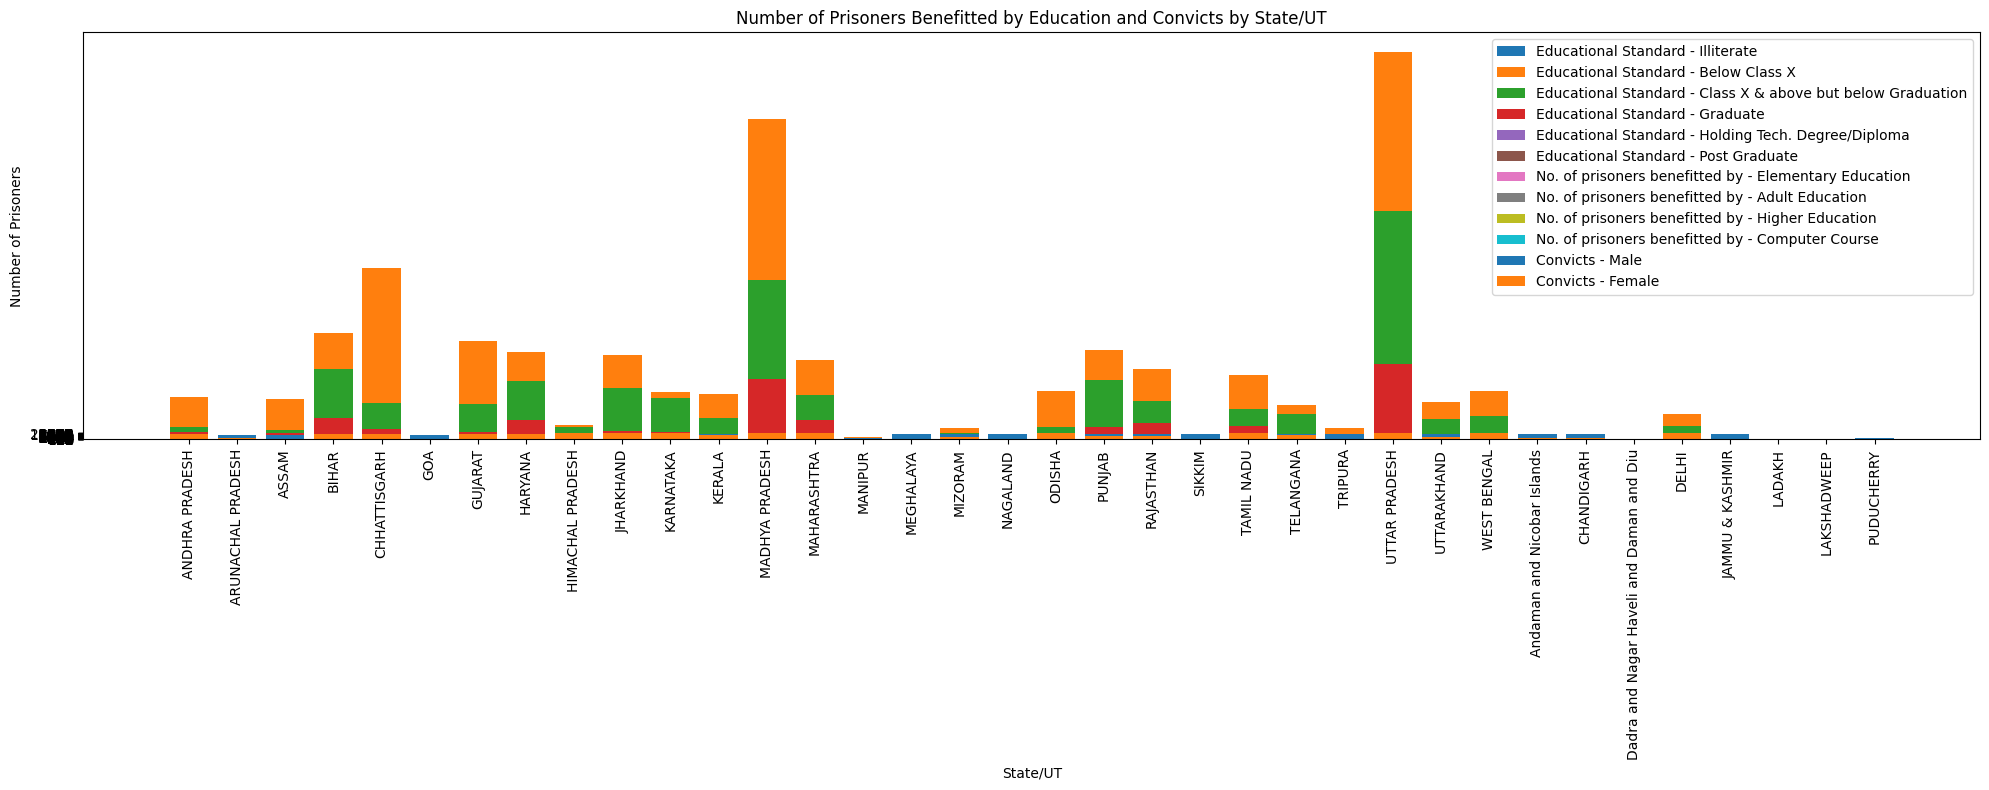

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("PrisonersEducationAnalysis") \
    .getOrCreate()

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = joined.toPandas()

# Plotting
plt.figure(figsize=(20, 8))

# Plot each column as a bar
for column in pandas_df.columns[1:]:
    plt.bar(pandas_df["State/UT"], pandas_df[column], label=column)

plt.title('Number of Prisoners Benefitted by Education and Convicts by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Number of Prisoners')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
